# Multiple regression analysis with 2 independent variables using matrices
#### Home prices `y` based on the number of bedrooms `x1` and the number of bathrooms `x2`.(Obviously not in the Bay Area!)
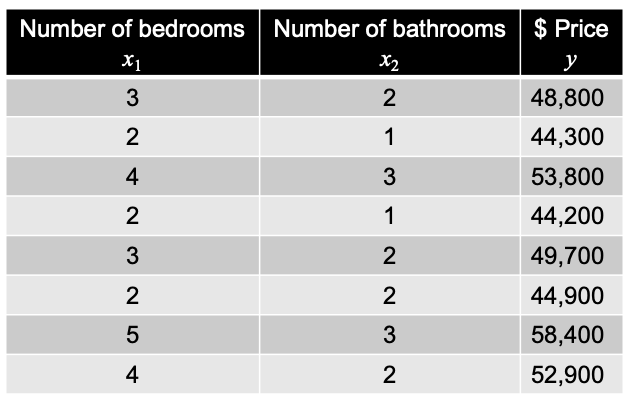. 


#### Use regression analysis to estimate the price of another home with 2 bedrooms and 1 bathroom, and the price of another home with 5 bedrooms and 3 bathrooms.
#### This is a multiple regression problem because we have more than one independent variables `x1` and `x2`. The regression equation is
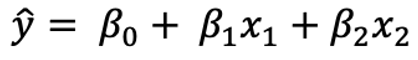
#### Just as we had to calculate linear regression coefficients `m` and `b`, we need to calculate the multiple regression coefficients `β0`, `β1`, and `β2`.

In [ ]:
import numpy as np
from statistics import mean
from pandas import DataFrame

In [ ]:
bedrooms  = [         3,          2,          4,          2,          3,          2,          5,          4]
bathrooms = [         2,          1,          3,          1,          2,          2,          3,          2]
prices    = [488_000.00, 443_000.00, 538_000.00, 442_000.00, 497_000.00, 449_000.00, 584_000.00, 529_000.00]

## Matrix `homes`

In [ ]:
homes = DataFrame( {'bedrooms': bedrooms, 'bathrooms': bathrooms, 'prices': prices} )
homes

## Matrix `base`

In [ ]:
n = len(homes)

avg_bedrooms  = mean(homes.bedrooms)
avg_bathrooms = mean(homes.bathrooms)
avg_prices    = mean(homes.bedrooms)

(n, avg_bedrooms, avg_bathrooms, avg_prices)

In [ ]:
base = DataFrame( 
    { 'x1':          homes.bedrooms, 
      'x1_centered': homes.bedrooms - avg_bedrooms,
      'x2':          homes.bathrooms,
      'x2_centered': homes.bathrooms - avg_bathrooms,
      'y':           homes.prices,
      'y_centered':  homes.prices - avg_prices 
    } 
)

base

## Vector `univariate_regression`

In [ ]:
avg_x1 = mean(base.x1)
avg_x2 = mean(base.x2)
avg_y  = mean(base.y)

sum_x1_x1_centered = 0
sum_x2_x2_centered = 0
sum_x1_x2_centered = 0

for i in range(n):
    sum_x1_x1_centered += base.x1_centered[i]*base.x1_centered[i]
    sum_x2_x2_centered += base.x2_centered[i]*base.x2_centered[i]
    sum_x1_x2_centered += base.x1_centered[i]*base.x2_centered[i]

univariate_regression = DataFrame(
    { 'x1_const': [avg_x2 - avg_x1*sum_x1_x2_centered/sum_x1_x1_centered],
      'beta1':    [sum_x1_x2_centered/sum_x1_x1_centered],
      'x2_const': [avg_x1 - avg_x2*sum_x1_x2_centered/sum_x2_x2_centered],
      'beta2':    [sum_x1_x2_centered/sum_x2_x2_centered]
    }
)

univariate_regression                                          

## Matrix `residuals`

In [ ]:
residuals = DataFrame(
    { 'x1':         base.x1,
      'x1_resid':   base.x1 - univariate_regression.beta2[0]*base.x2
                                  - univariate_regression.x2_const[0],
      'x2':         base.x2,
      'x2_resid':   base.x2 - univariate_regression.beta1[0]*base.x1
                                  - univariate_regression.x1_const[0],
      'y':          base.y,
      'y_centered': base.y_centered
    }
)

residuals

## Vector `multiple_regression_2`

In [ ]:
avg_x1 = mean(residuals.x1)
avg_x2 = mean(residuals.x2)
avg_y  = mean(residuals.y)

sum_x1_x1_resid = 0
sum_x2_x2_resid = 0
sum_y_centered_x1_resid = 0
sum_y_centered_x2_resid = 0

for i in range(n):
    sum_x1_x1_resid += residuals.x1_resid[i]*residuals.x1_resid[i]
    sum_x2_x2_resid += residuals.x2_resid[i]*residuals.x2_resid[i]
    sum_y_centered_x1_resid += residuals.y_centered[i]*residuals.x1_resid[i]
    sum_y_centered_x2_resid += residuals.y_centered[i]*residuals.x2_resid[i]

multiple_regression_2 = DataFrame( 
    { 'β0': [avg_y - avg_x1*sum_y_centered_x1_resid/sum_x1_x1_resid
                   - avg_x2*sum_y_centered_x2_resid/sum_x2_x2_resid], 
      'β1': [sum_y_centered_x1_resid/sum_x1_x1_resid], 
      'β2': [sum_y_centered_x2_resid/sum_x2_x2_resid]
    }
)

multiple_regression_2

## Estimates

In [ ]:
β0 = multiple_regression_2.β0[0]
β1 = multiple_regression_2.β1[0]
β2 = multiple_regression_2.β2[0]

est_2_1 = β0 + 2*β1 + 1*β2
est_5_3 = β0 + 5*β1 + 3*β2

print(f'est_2_1 = ${est_2_1:,.2f}')
print(f'est_5_3 = ${est_5_3:,.2f}')